In [33]:
"""
Machine Learning Homework 1
Done by:
Mariana Santana 106992
Pedro Leal 106154
LEIC-A
"""

'\nMachine Learning Homework 1\nDone by:\nMariana Santana 106992\nPedro Leal 106154\nLEIC-A\n'

#### II. Programming
#### Consider the heart-disease.csv dataset available at the course webpage’s homework tab. Using sklearn, apply a 5-fold stratified cross-validation with shuffling (random_state=0) for the assessment of predictive models along this section.

In [34]:
"""
General imports and variables for all exercises; run this cell before any other
"""
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_rel

data = pd.read_csv('heart-disease.csv')

X = data.drop(columns='target')
y = data['target']

#### 1) Compare the performance of a 𝑘𝑁𝑁 with k=5 with and a naïve Bayes with Gaussian assumption (consider all remaining parameters as default):
#### a. [1.0v] Plot two boxplots with the fold accuracies for each classifier. Is there one more stable than the other regarding performance? Why do you think that is the case? Explain.

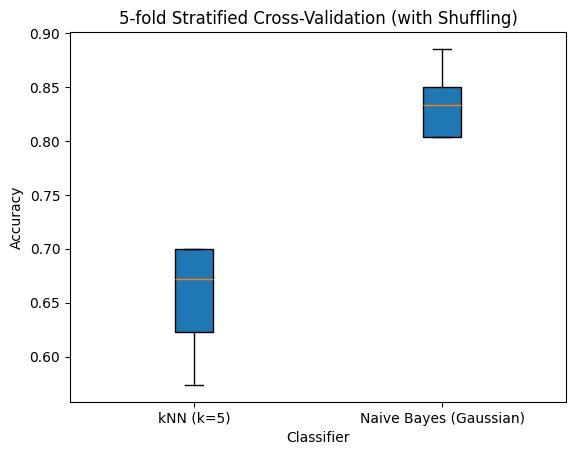

In [35]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

classifiers = [KNeighborsClassifier(n_neighbors=5), GaussianNB()]
classifier_names = ['kNN (k=5)', 'Naive Bayes (Gaussian)']

classifier_accuracies = []
for classifier in classifiers:
    accuracies = cross_val_score(classifier, X, y, cv=stratified_kfold)
    classifier_accuracies.append(accuracies)

plt.boxplot(classifier_accuracies, patch_artist=True)
plt.xticks(np.arange(1, len(classifier_names) + 1), classifier_names)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('5-fold Stratified Cross-Validation (with Shuffling)')
plt.show()

The boxplot above shows that the Naive Bayes classifier has a smaller interquartile range and doesn't show such extreme outliers when compared to the kNN classifier. On the other hand, the kNN classifier exhibits a larger variance in performance, as indicated by the wider range of accuracy values.

Naive Bayes is by definition more stable because it assumes the independence of features and uses probability distributions. This tends to result in a consistent performance and less susceptible to data variations, even with different train-test splits.  

For kNN, its stability is easily influenced by the choice of the k parameter and the nature of the data, as the classifier's sensitivity to slight changes in the data is high, because it uses directly the distances between neighboring data points to classify. 

In conclusion, the plot's results show that the Naive Bayes classifier is more stable than kNN because of its probabilistic nature and smaller performance variability.

#### b. [1.0v] Report the accuracy of both models, this time scaling the data with a Min-Max scaler before training the models. Explain the impact that this preprocessing step has on the performance of each model, providing an explanation for the results.

kNN (k=5) Mean Accuracy: 0.8217
Naive Bayes (Gaussian) Mean Accuracy: 0.8350


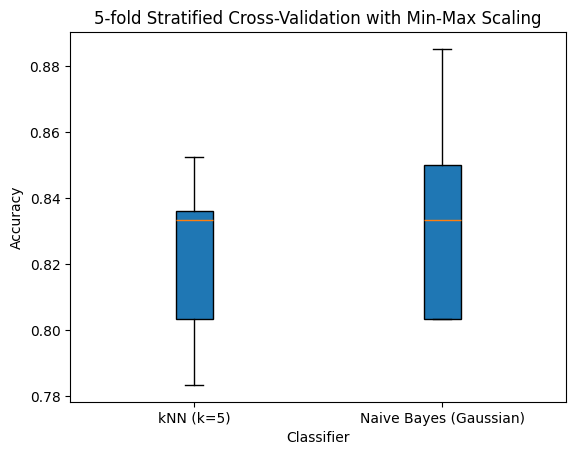

In [36]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

classifier_accuracies_scaled = []
for classifier in classifiers:
    accuracies = cross_val_score(classifier, X_scaled, y, cv=stratified_kfold)
    classifier_accuracies_scaled.append(accuracies)

for name, accuracies in zip(classifier_names, classifier_accuracies_scaled):
    print(f'{name} Mean Accuracy: {np.mean(accuracies):.4f}')

plt.boxplot(classifier_accuracies_scaled, patch_artist=True)
plt.xticks(np.arange(1, len(classifier_names) + 1), classifier_names)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('5-fold Stratified Cross-Validation with Min-Max Scaling')
plt.show()


The Min-Max Scaling is used to normalize the range of features in a dataset.  

This is especially helpful for the kNN model, because it relies on the Euclidean distance between points. When the features are not scaled, attributes with larger numerical ranges dominate the distance calculations, making the kNN classifier biased towards certain features. The scaling ensures that each feature contributes equally to the distance computation, leading to more meaningful neighborhoods and potentially improved classification accuracy, as shown in the generated plot.

For the Naive Bayes model, a significant change might not happen after scaling, because Gaussian Naive Bayes assumes a normal distribution for each feature and the Min-Max scaling doesn't change the overall structure of a feature's distribution, just its range.

In conclusion, after comparing both, we see that with Min-Max scaling, the kNN model's performance improves because it now works with balanced distances for all features and the Gaussian Naive Bayes model is relatively insensitive since it only works with the probability distributions of the features.

#### c. [1.0v] Using scipy, test the hypothesis “the model kNN is statistically superior to Naïve Bayes regarding accuracy”, asserting whether it is true.

In [37]:
kNN_accuracies = cross_val_score(classifiers[0], X_scaled, y, cv=stratified_kfold)
NB_accuracies = cross_val_score(classifiers[1], X_scaled, y, cv=stratified_kfold)

t_stat, p_value = ttest_rel(kNN_accuracies, NB_accuracies, alternative='greater')

print(f"kNN Mean Accuracy: {np.mean(kNN_accuracies):.4f}")
print(f"Naive Bayes Mean Accuracy: {np.mean(NB_accuracies):.4f}")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. kNN is statistically superior to Naive Bayes in terms of accuracy.")
else:
    print("Fail to reject the null hypothesis. kNN is not statistically superior to Naive Bayes.")

kNN Mean Accuracy: 0.8217
Naive Bayes Mean Accuracy: 0.8350
t-statistic: -0.7271, p-value: 0.7463
Fail to reject the null hypothesis. kNN is not statistically superior to Naive Bayes.


As calculated when the code above is ran, the p-value equals 0.7463 which is larger than 0.05, a commom alpha for t-student tests.

#### 2) Using a 80-20 train-test split, vary the number of neighbors of a 𝑘𝑁𝑁 classifier using 𝑘 = {1, 5, 10, 20, 30}. Additionally, for each k, train one classifier using uniform weights and distance weights.
#### a. [1.0v] Plot the train and test accuracy for each model.

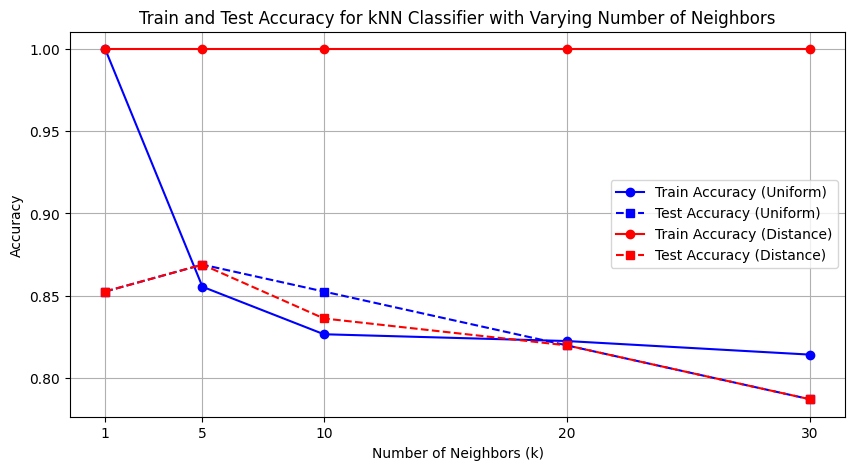

In [38]:

# Assuming X_scaled and y are defined and preprocessed

# Perform an 80-20 train-test split on the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Define the values of k to test
k_values = sorted([1, 5, 10, 20, 30])  # Ensure k values are sorted in ascending order

# Store the train and test accuracies for different k values
train_accuracy_uniform = []
test_accuracy_uniform = []
train_accuracy_distance = []
test_accuracy_distance = []

# Train kNN models for each value of k using both uniform and distance weights
for k in k_values:
    # Train a kNN classifier with uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    train_accuracy_uniform.append(knn_uniform.score(X_train, y_train))
    test_accuracy_uniform.append(knn_uniform.score(X_test, y_test))

    # Train a kNN classifier with distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    train_accuracy_distance.append(knn_distance.score(X_train, y_train))
    test_accuracy_distance.append(knn_distance.score(X_test, y_test))

# Plotting the results
plt.figure(figsize=(10, 5))

# Uniform weights - Train and Test accuracy
plt.plot(k_values, train_accuracy_uniform, marker='o', linestyle='-', color='b', label='Train Accuracy (Uniform)')
plt.plot(k_values, test_accuracy_uniform, marker='s', linestyle='--', color='b', label='Test Accuracy (Uniform)')

# Distance weights - Train and Test accuracy
plt.plot(k_values, train_accuracy_distance, marker='o', linestyle='-', color='r', label='Train Accuracy (Distance)')
plt.plot(k_values, test_accuracy_distance, marker='s', linestyle='--', color='r', label='Test Accuracy (Distance)')

# Customize the plot
plt.title('Train and Test Accuracy for kNN Classifier with Varying Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

#### b. [1.5v] Explain the impact of increasing the neighbors on the generalization ability of the models.

Analysis
a) Explanation of the Plot:
The plots show the training and test accuracies for both uniform and distance weighting strategies as a function of the number of neighbors (k).
The solid lines represent training accuracies, and the dashed lines represent testing accuracies.
b) Impact of Increasing the Number of Neighbors (k):
General Trends:

As the number of neighbors (k) increases, the training accuracy decreases for both weighting strategies.
This is expected because a larger k means that the model considers a broader neighborhood, leading to a smoother decision boundary that is less overfitted to the training data.
Test accuracy initially increases and then may plateau or even decrease.
With a small k, the model can overfit (high training accuracy but lower test accuracy).
As k increases, the model generalizes better, but after a certain point, using too many neighbors can cause underfitting, reducing the test accuracy.
Comparison Between Uniform and Distance Weights:

For uniform weights, all neighbors contribute equally, which can lead to instability when the neighbors have varying distances from the query point.
For distance weights, closer neighbors have a higher impact on the decision, which typically improves generalization and robustness.
As a result, distance-weighted models often show better test accuracy and are less prone to overfitting compared to uniform-weighted models.
Conclusion:
Increasing k typically improves generalization up to a certain point, after which too many neighbors cause underfitting.
Using distance weights can mitigate the issues with high values of k, leading to better overall performance.

#### 3) [1.5v] Considering the unique properties of the heart-disease.csv dataset, identify two possible difficulties of the naïve Bayes model used in the previous exercises when learning from the given dataset.

The Naive Bayes model is especially well suited for datasets with independent features. Also, this model has variations for handling categorical or continuous data (separatelly), but it performs poorly when the dataset has both.

Firstly, in the heart-disease dataset, there are some features that may be correlated, which is commom in medical datasets (for example, a person's cholesterol level may affect their blood pressure). This violation of the independence assumption can lead to poor performance, as the model might not capture the underlying relationships between these attributes.

Secondly, the types of variables in the dataset may pose a problem to its performance, because none of the Naive Bayes' variantions handles ## both continuous and categorical data (ex. age and sex, respectivelly). Also, even if the model only observed continuous data, if the values don't follow a Gaussian/normal distribuition or have many extreme outliers, the final model's distributions could get skewed and imprecise. 

In summary, the naïve Bayes model's assumption of feature independence and its handling of categorical/continuous variables could limit its effectiveness on the heart-disease dataset.